# Example 1: Basic Grid Simulation and Plotting

This notebook demonstrates the basic functionality of WEC-GRID:
- Loading a power system model
- Running a basic simulation
- Creating visualizations with the plotting module
- Exploring grid state data

This example uses the IEEE 14-bus test system for demonstration.

## Step 1: Initialize the WEC-GRID Engine

The Engine is the core component that manages power system simulations. We'll initialize it with the IEEE 14-bus test system.

In [1]:
import os
import wecgrid

engine = wecgrid.Engine()

engine.case("./grid/IEEE_14_bus.raw")
engine.load(["pypsa"])

PyPSA software initialized


## Step 2: Explore the Grid State

WEC-GRID uses a unified GridState object to represent power system data across different backends. Let's examine the grid structure.

In [2]:
grid = engine.pypsa.grid
grid

GridState:
├─ bus:   14
│   └─ time-series: bus, bus_name, type, p, q, v_mag, angle_deg, Vbase
├─ gen:   5
│   └─ time-series: gen, gen_name, bus, p, q, Mbase, status
├─ line:  17
│   └─ time-series: line, line_name, ibus, jbus, line_pct, status
└─ load:  11
    └─ time-series: load, load_name, bus, p, q, status

In [7]:
grid.line_t.keys()

dict_keys(['line', 'line_name', 'ibus', 'jbus', 'line_pct', 'status'])

In [11]:
grid.gen

,gen,gen_name,bus,p,q,Mbase,status
0,1,Gen_1,1,2.326,-0.087242,0.0,1
1,2,Gen_2,2,0.400,0.585843,0.0,1
2,3,Gen_3,3,0.000,0.312554,0.0,1
3,4,Gen_4,6,0.000,0.230034,0.0,1
4,5,Gen_5,8,0.000,0.251130,0.0,1


In [9]:
grid.load

,load,load_name,bus,p,q,status
0,1,Load_1,2,0.217,0.127,1
1,2,Load_2,3,0.942,0.190,1
2,3,Load_3,4,0.478,-0.039,1
3,4,Load_4,5,0.076,0.016,1
4,5,Load_5,6,0.112,0.075,1
5,6,Load_6,9,0.295,0.166,1
6,7,Load_7,10,0.090,0.058,1
7,8,Load_8,11,0.035,0.018,1
8,9,Load_9,12,0.061,0.016,1
9,10,Load_10,13,0.135,0.058,1


In [12]:
grid.line

,line,line_name,ibus,jbus,line_pct,status
0,1,Line_1,1,2,NaN,1
1,2,Line_2,1,5,NaN,1
2,3,Line_3,2,3,NaN,1
3,4,Line_4,2,4,NaN,1
4,5,Line_5,2,5,NaN,1
5,6,Line_6,3,4,NaN,1
6,7,Line_7,4,5,NaN,1
7,8,Line_8,6,11,NaN,1
8,9,Line_9,6,12,NaN,1
9,10,Line_10,6,13,NaN,1


In [15]:
grid.bus_t.p

,Bus_1,Bus_2,Bus_3,Bus_4,Bus_5,Bus_6,Bus_7,Bus_8,Bus_9,Bus_10,Bus_11,Bus_12,Bus_13,Bus_14
2025-08-20,2.326,0.183,-0.942,-0.478,-0.076,-0.112,0.0,0.0,-0.295,-0.09,-0.035,-0.061,-0.135,-0.149


## Step 3: Run a Basic Steady State Power Flow Simulation.

Now let's run a power flow simulation to solve the grid state and analyze the results with a load.

In [ ]:
engine.simulate(
    load_curve=True,
    num_steps=288 # 1 day of 5 min intervals 
)

PyPSA Simulating:   0%|          | 0/288 [00:00<?, ?step/s]

PyPSA Simulating:  50%|█████     | 144/288 [00:46<01:30,  1.59step/s]

## Step 4: Visualize the Grid with WEC-GRID Plotting

The WECGridPlot module provides powerful visualization capabilities including single-line diagrams, time series plots, and more.

In [ ]:
plot = engine.plot

(<Figure size 1200x600 with 1 Axes>,
 <AxesSubplot:title={'center':'BUS P - PYPSA'}, xlabel='Time', ylabel='Active Power (MW)'>)

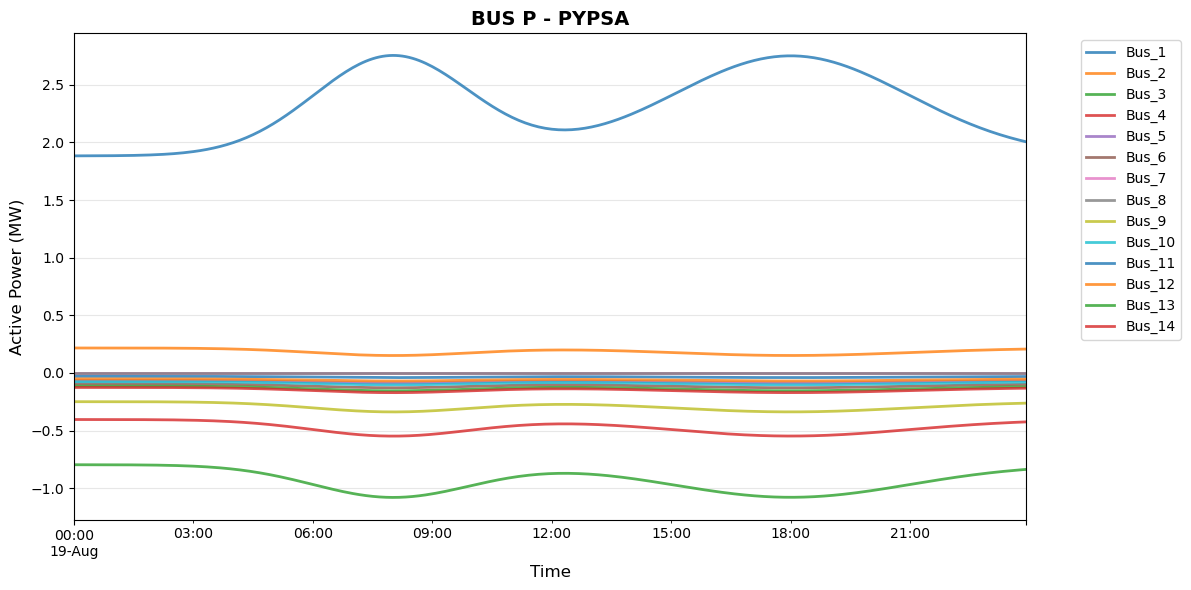

In [ ]:
plot.bus()

(<Figure size 1200x600 with 1 Axes>,
 <AxesSubplot:title={'center':'GEN P - PYPSA'}, xlabel='Time', ylabel='Active Power (MW)'>)

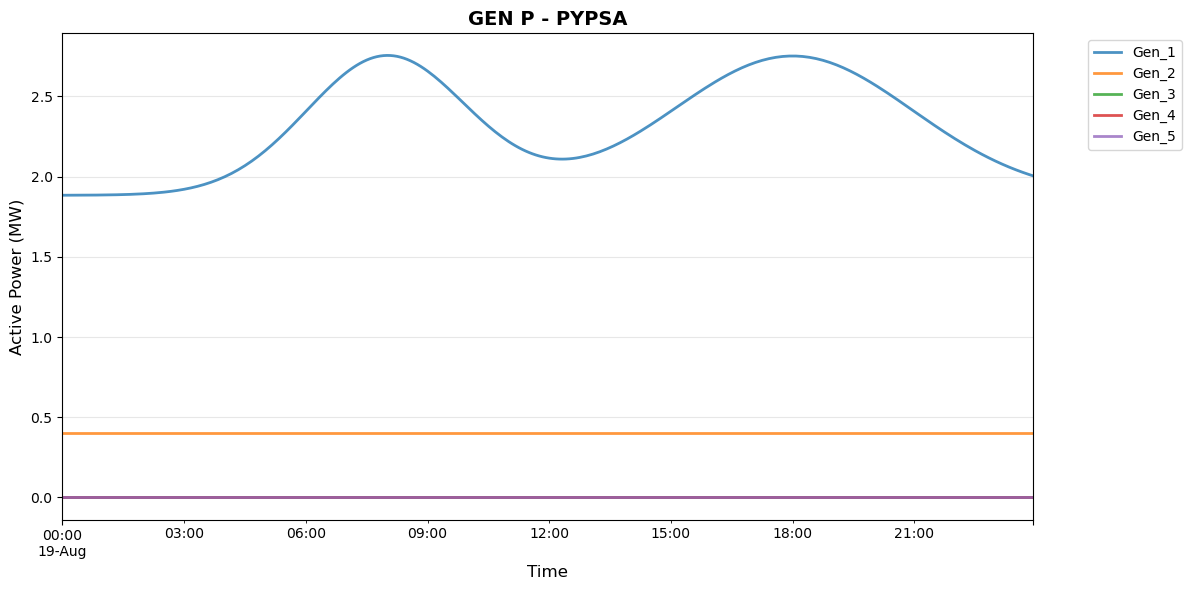

In [ ]:
plot.gen()

(<Figure size 1200x600 with 1 Axes>,
 <AxesSubplot:title={'center':'LOAD P - PYPSA'}, xlabel='Time', ylabel='Active Power (MW)'>)

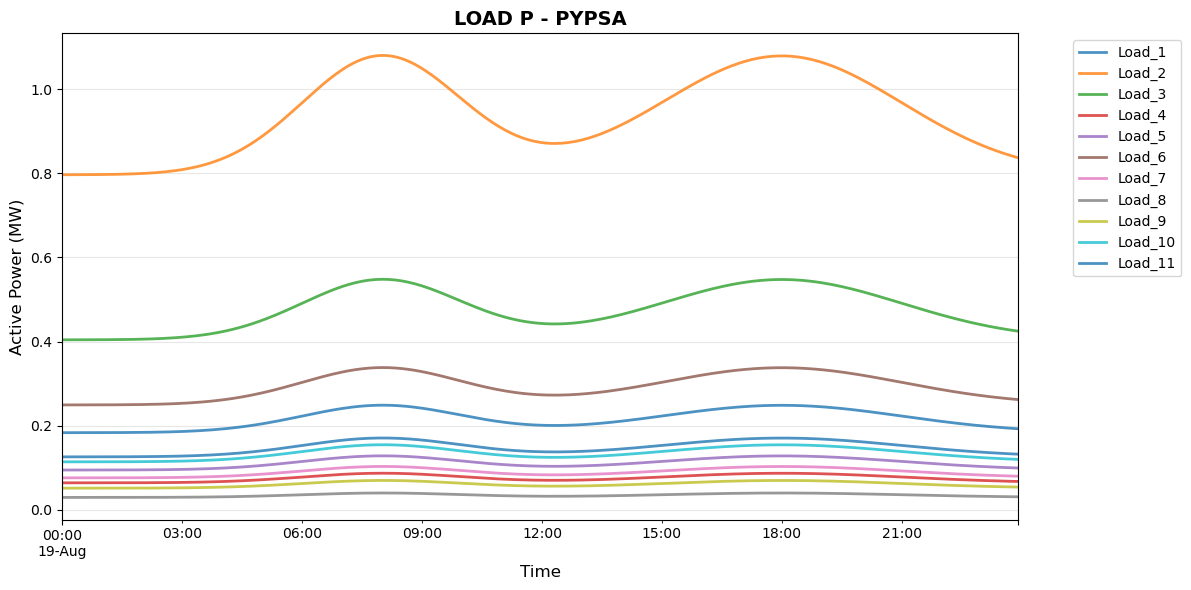

In [ ]:
plot.load()